In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [3]:
matplotlib.rcParams['font.size'] = 15 # 폰트 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시 마이너스 글자가 깨지는 것 방지

In [4]:
import pandas as pd

'''
원본 데이터 출처
https://www.kobis.or.kr/kobis/business/stat/offc/findFormerBoxOfficeList.do
'''

# Excel 파일 경로
file_path = 'KOBIS_역대_박스오피스_내역.xlsx'

# Excel 파일 열기 (openpyxl 엔진 사용)
row = pd.read_excel(file_path, engine='openpyxl')

# 데이터프레임 출력
print(row)


        순위                 영화명        개봉일           매출액        관객수  \
0      NaN                 NaN        NaT           NaN  (S:서울 기준)   
1      1.0                  명량 2014-07-30  1.357484e+11        NaN   
2      2.0                극한직업 2019-01-23  1.396480e+11        NaN   
3      3.0           신과함께-죄와 벌 2017-12-20  1.156987e+11        NaN   
4      4.0                국제시장 2014-12-17  1.109135e+11        NaN   
..     ...                 ...        ...           ...        ...   
496  496.0               존 윅 4 2023-04-12  1.995665e+10        NaN   
497  497.0                  터보 2013-07-25  1.311358e+10        NaN   
498  498.0                  애자 2009-09-09  1.378588e+10        NaN   
499  499.0              내안의 그놈 2019-01-09  1.641212e+10        NaN   
500  500.0  천박사 퇴마 연구소: 설경의 비밀 2023-09-27  1.863549e+10        NaN   

     Unnamed: 5       스크린수  Unnamed: 7 대표국적   국적                     배급사  
0           NaN  (S:서울 기준)         NaN  NaN  NaN                     NaN  
1    1761

In [5]:
row.head()

,순위,영화명,개봉일,매출액,관객수,Unnamed: 5,스크린수,Unnamed: 7,대표국적,국적,배급사
0,NaN,NaN,NaT,NaN,(S:서울 기준),NaN,(S:서울 기준),NaN,NaN,NaN,NaN
1,1.0,명량,2014-07-30,1.357484e+11,NaN,17613682.0,NaN,1587.0,한국,한국,(주)씨제이이엔엠
2,2.0,극한직업,2019-01-23,1.396480e+11,NaN,16264944.0,NaN,1978.0,한국,한국,(주)씨제이이엔엠
3,3.0,신과함께-죄와 벌,2017-12-20,1.156987e+11,NaN,14410754.0,NaN,1912.0,한국,한국,롯데쇼핑㈜롯데엔터테인먼트
4,4.0,국제시장,2014-12-17,1.109135e+11,NaN,14257115.0,NaN,966.0,한국,한국,(주)씨제이이엔엠


In [6]:
dateData = {"date" : row['개봉일']}

df = pd.DataFrame(dateData)
df['date'] = pd.to_datetime(df['date'], errors='coerce')

df['year'] = df['date'].dt.year
df

,date,year
0,NaT,NaN
1,2014-07-30,2014.0
2,2019-01-23,2019.0
3,2017-12-20,2017.0
4,2014-12-17,2014.0
...,...,...
496,2023-04-12,2023.0
497,2013-07-25,2013.0
498,2009-09-09,2009.0
499,2019-01-09,2019.0


In [7]:
# 딕셔너리로 값을 관리할 열 선택
selected_column = 'year'

# 선택한 열의 값들의 등장 횟수 계산
value_counts = df[selected_column].value_counts()

# 딕셔너리로 변환
sorted_dict = dict(sorted(value_counts.items()))

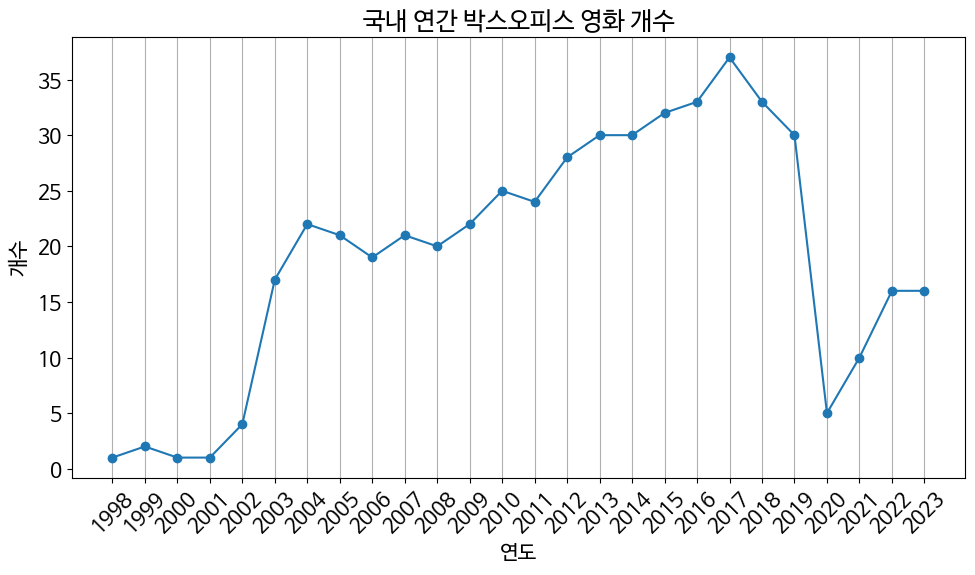

In [8]:
# 데이터 정렬
sorted_data = sorted(sorted_dict.items())

years = [year for year, count in sorted_data]
counts = [count for year, count in sorted_data]

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(years, counts, marker='o', linestyle='-')
plt.title('국내 연간 박스오피스 영화 개수')
plt.xlabel('연도')
plt.ylabel('개수')
plt.grid(axis = 'x')
plt.xticks(years, rotation=45)
plt.tight_layout()

plt.show()